# Carga de conjunto de datos

Esta parte puede tardar un rato ya que el conjunto es grande.

In [ ]:
#Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copiar el conjunto a la instancia de Google Colab

!cp /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton/Datasets/WHOI_MVCO_Planktonnet.zip /content/

In [ ]:
# Descomprimir el conjunto de datos
! unzip /content/WHOI_MVCO_Planktonnet.zip

# Funciones extras (Ejecutar todas)

Estas son funciones que se mandan a llamar para graficar o hacer un dataframe

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
def graficar_elementos_por_subcarpeta(df,column,title):
    """
    Función para graficar un DataFrame donde se muestren las subcarpetas en el eje Y
    y el número de elementos del dataset en el eje X.

    Parámetros:
    df (DataFrame): DataFrame con las columnas 'Subcarpeta' y 'Elementos_dataset'
    """

    df = df[df['Subcarpeta'] != '.']

    # Ordenar el DataFrame de mayor a menor en base a 'Elementos_dataset'
    df_ordenado = df.sort_values(by=column, ascending=True)

    # Crear la gráfica de barras horizontales
    plt.figure(figsize=(12, 35))
    barras = plt.barh(df_ordenado['Subcarpeta'], df_ordenado[column], color='skyblue')

    # Configurar el formato de los ejes para que no muestre notación científica
    ax = plt.gca()  # Obtener los ejes actuales
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))  # Formato normal
    ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica

    # Añadir etiquetas al final de cada barra
    for barra in barras:
        ancho = barra.get_width()  # Obtener la longitud de cada barra
        plt.text(ancho, barra.get_y() + barra.get_height()/2,  # Posición del texto
                 f'{int(ancho)}',  # Texto a mostrar
                 va='center')  # Alinear verticalmente el texto al centro de la barra

    # Añadir etiquetas y título
    plt.xlabel('Elementos en Dataset')
    plt.ylabel('Clase')
    plt.title(title)

    # Mostrar la gráfica
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def graficar_suma_por_fila(df):
    """
    Función para graficar la suma de los valores de test, train y val por cada subcarpeta
    en un gráfico de barras horizontales.

    Parámetros:
    df (DataFrame): DataFrame con las columnas 'Subcarpeta', 'Elementos_test', 'Elementos_train', 'Elementos_val'
    """
    # Calcular la suma por fila (test, train y val)
    df['Total'] = df[['Elementos_test', 'Elementos_train', 'Elementos_val']].sum(axis=1)

    df = df.sort_values(by='Total', ascending=True)

    df = df[df['Subcarpeta'] != '.']

    # Graficar la suma por fila como barras horizontales
    plt.figure(figsize=(15, 12))
    barras = plt.barh(df['Subcarpeta'], df['Total'], color='skyblue')

    # Añadir etiquetas y título
    plt.xlabel('Total de imágenes')
    plt.ylabel('Género fitplancton')
    plt.title('Dataset')

    # Mostrar los valores al final de cada barra
    for barra in barras:
        ancho = barra.get_width()  # Obtener la longitud de cada barra
        plt.text(ancho, barra.get_y() + barra.get_height()/2,  # Posición del texto
                 str(int(ancho)),  # Texto a mostrar
                 va='center')  # Alinear verticalmente el texto al centro de la barra

    # Ajustar los márgenes
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

In [ ]:
#Esta funcion sirve para graficar el entrenamiento del modelo

import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
#Estas funciones son para crear un dataframe de los conjuntos de datos

import os
import pandas as pd

def contar_elementos_por_subcarpeta(directorio):
    elementos_por_subcarpeta = {}

    for ruta_actual, carpetas, archivos in os.walk(directorio):
        subcarpeta = os.path.relpath(ruta_actual, directorio)
        cantidad_elementos = len(carpetas) + len(archivos)

        elementos_por_subcarpeta[subcarpeta] = cantidad_elementos

    return elementos_por_subcarpeta

def comparar_varios_directorios(directorios):
    datos_por_directorio = {}

    # Contar elementos en cada subcarpeta de todos los directorios
    for directorio in directorios:
        datos_por_directorio[directorio] = contar_elementos_por_subcarpeta(directorio)

    # Crear un DataFrame para comparar las subcarpetas
    df = pd.DataFrame()
    for directorio, datos in datos_por_directorio.items():
        subcarpetas = list(datos.keys())
        elementos = list(datos.values())

        df_actual = pd.DataFrame({
            'Subcarpeta': subcarpetas,
            f'Elementos_{os.path.basename(directorio)}': elementos
        })

        if df.empty:
            df = df_actual
        else:
            df = pd.merge(df, df_actual, on='Subcarpeta', how='outer')

    return df

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(y_true, y_pred, class_names):
    """
    Genera y muestra un reporte de clasificación.

    Parámetros:
    y_true (array-like): Etiquetas verdaderas.
    y_pred (array-like): Etiquetas predichas.
    class_names (list): Lista con los nombres de las clases.
    """
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_normalized_confusion_matrix(y_true, y_pred, class_names):
    """
    Genera y muestra una matriz de confusión normalizada.

    Parámetros:
    y_true (array-like): Etiquetas verdaderas.
    y_pred (array-like): Etiquetas predichas.
    class_names (list): Lista con los nombres de las clases.
    """
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Precision (%)'})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Normalized by True Class)')
    plt.show()


# Exploración inicial de los datos

In [ ]:
# Lista de directorios que deseas comparar
directorios = [
    '/content/content/WHOI_MVCO_Planktonnet/train',
    '/content/content/WHOI_MVCO_Planktonnet/val',
    '/content/content/WHOI_MVCO_Planktonnet/test'
]

# Comparar los directorios y obtener el DataFrame
df = comparar_varios_directorios(directorios)

# Imprimir el DataFrame

print(df.to_string())

           Subcarpeta  Elementos_train  Elementos_val  Elementos_test
0                   .               72             72              72
1          acanthoica             2505            537             538
2            akashiwo               56             12              13
3         alexandrium               60             13              14
4              amoeba              756            163             163
5         amphidinium              427             92              93
6              amylax               45              9              11
7          apedinella             1162            250             249
8    asterionellopsis             2847            611             611
9          bacillaria               75             17              17
10      bacteriastrum              111             24              26
11         biddulphia              121             26              27
12       calciopappus              144             31              33
13        cerataulin

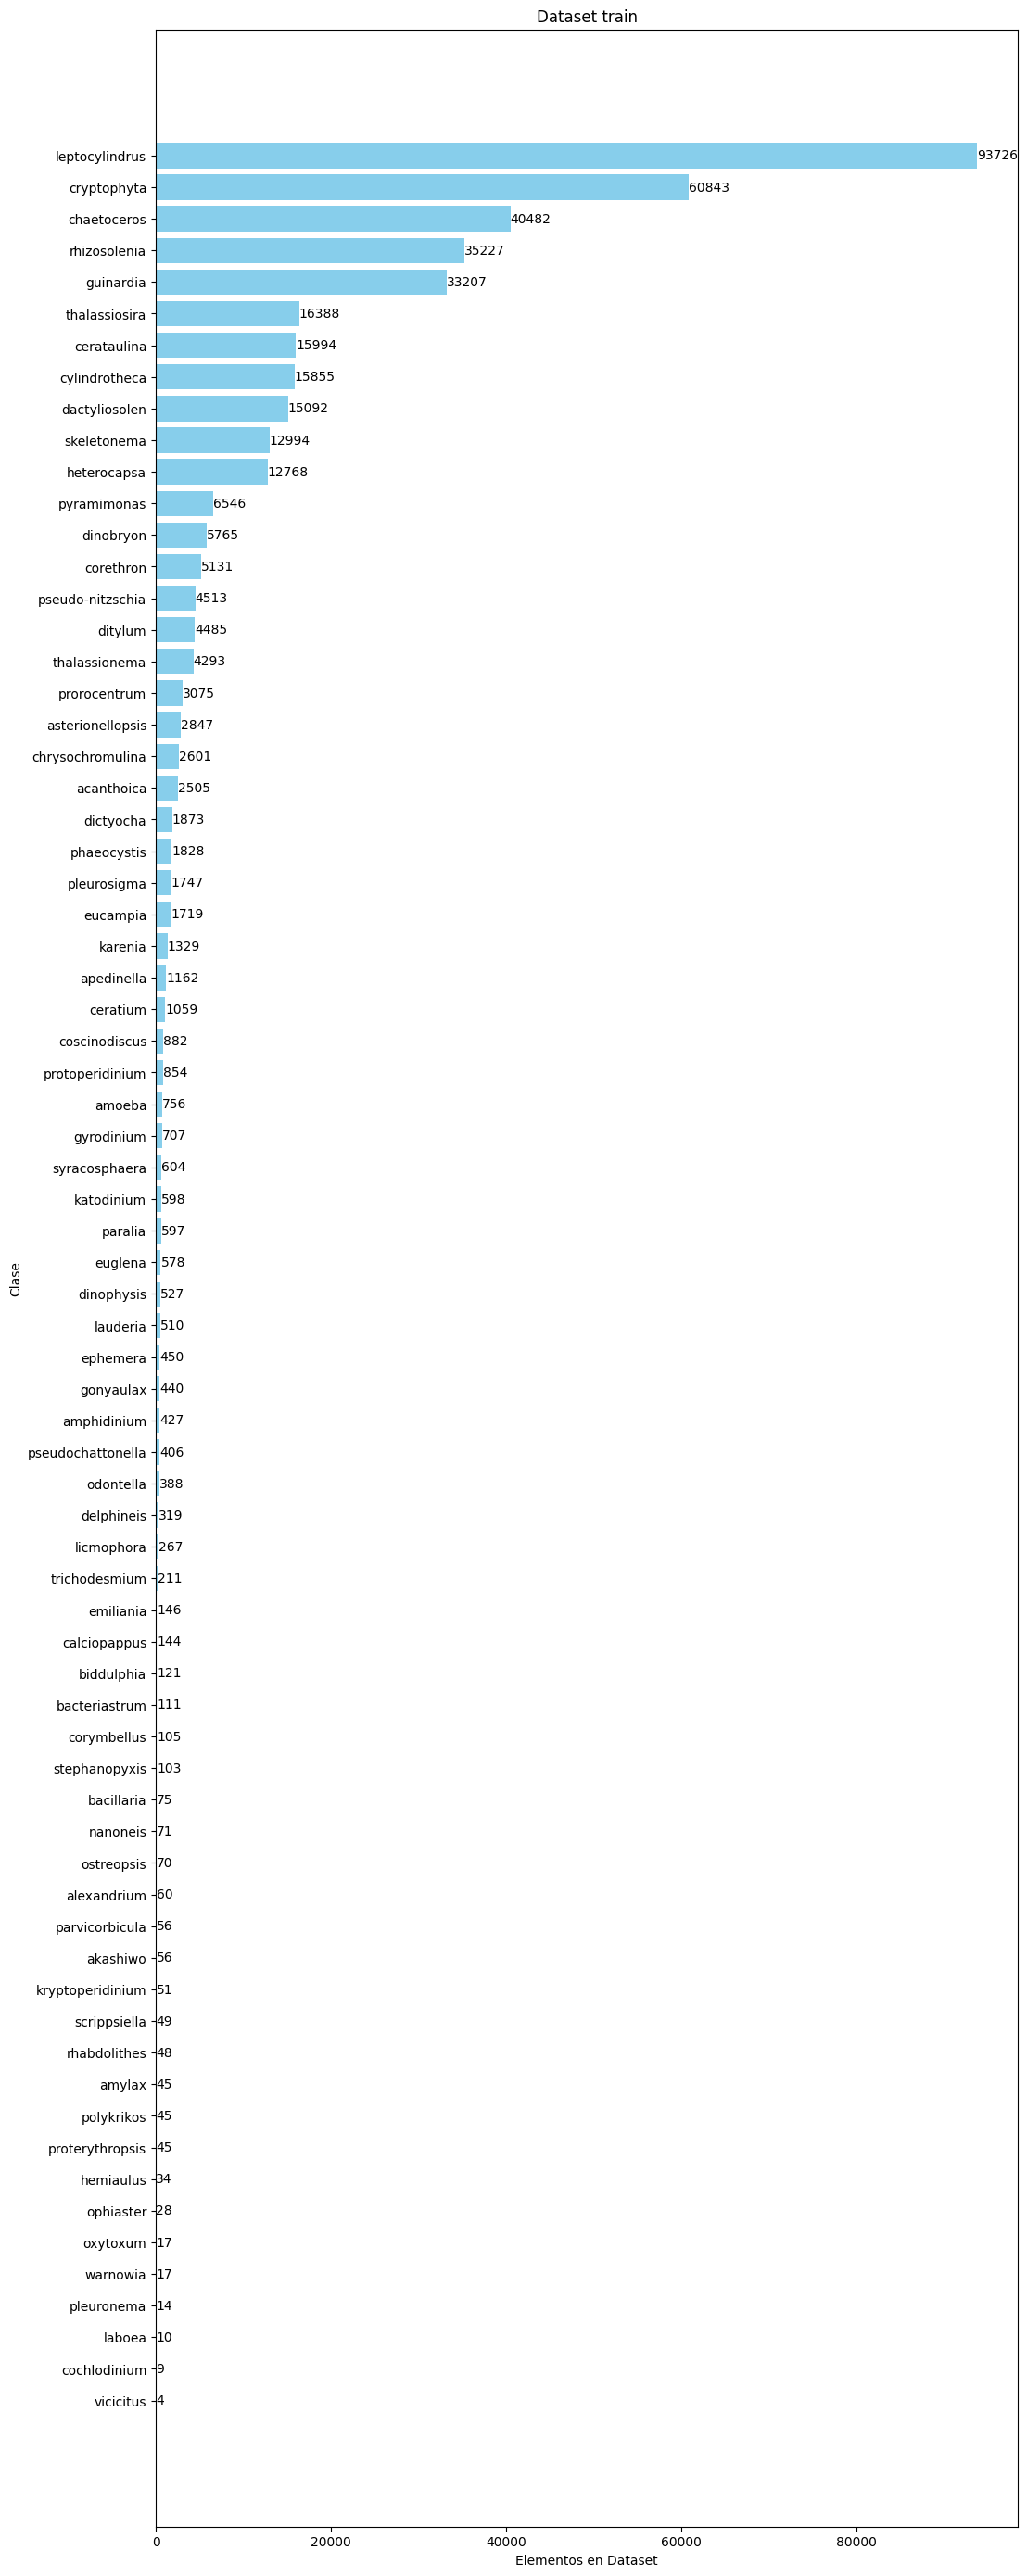

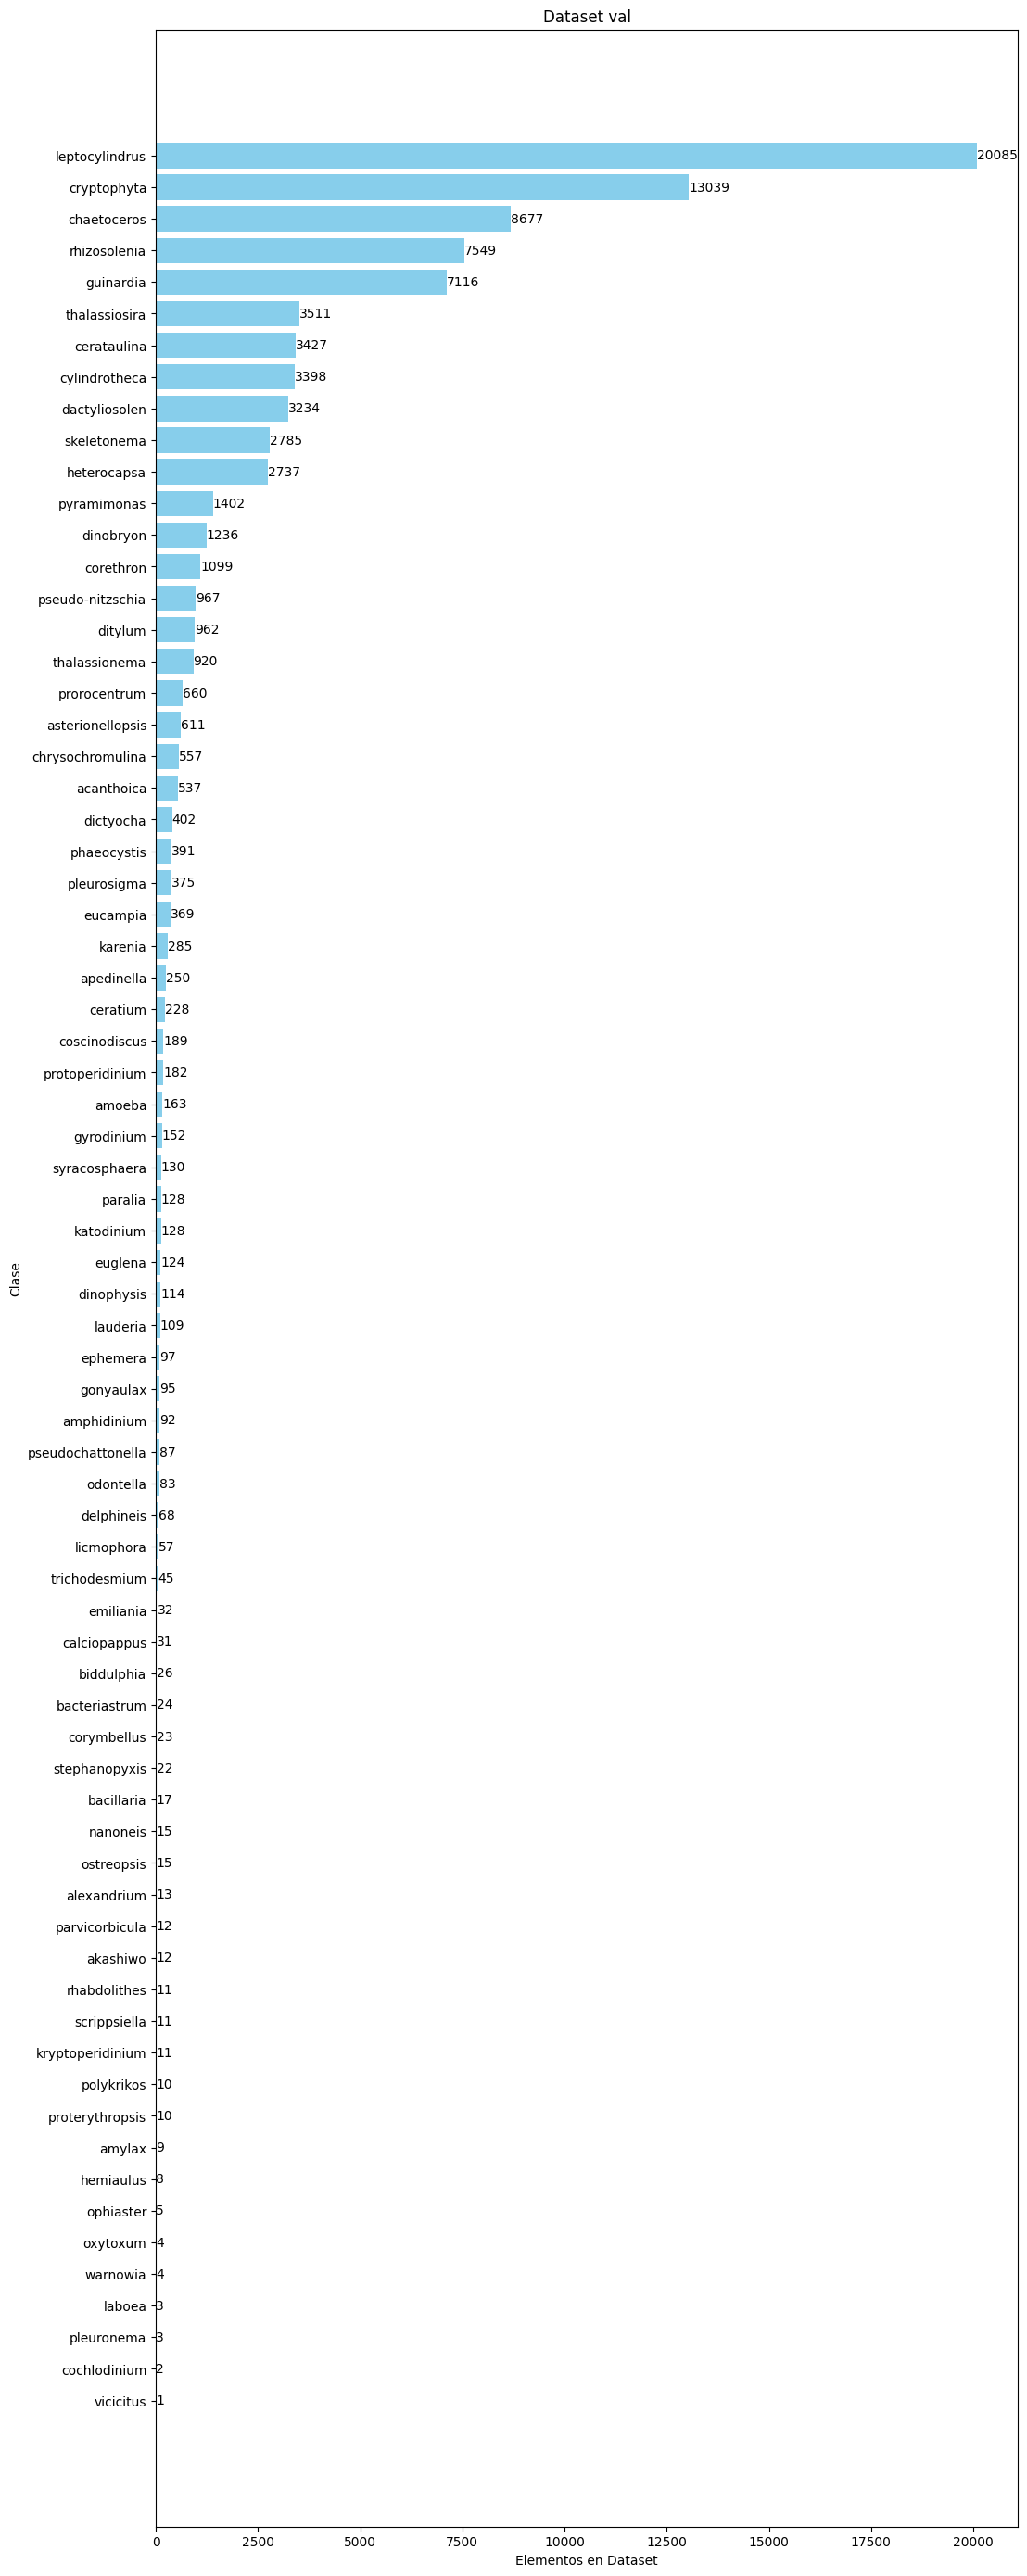

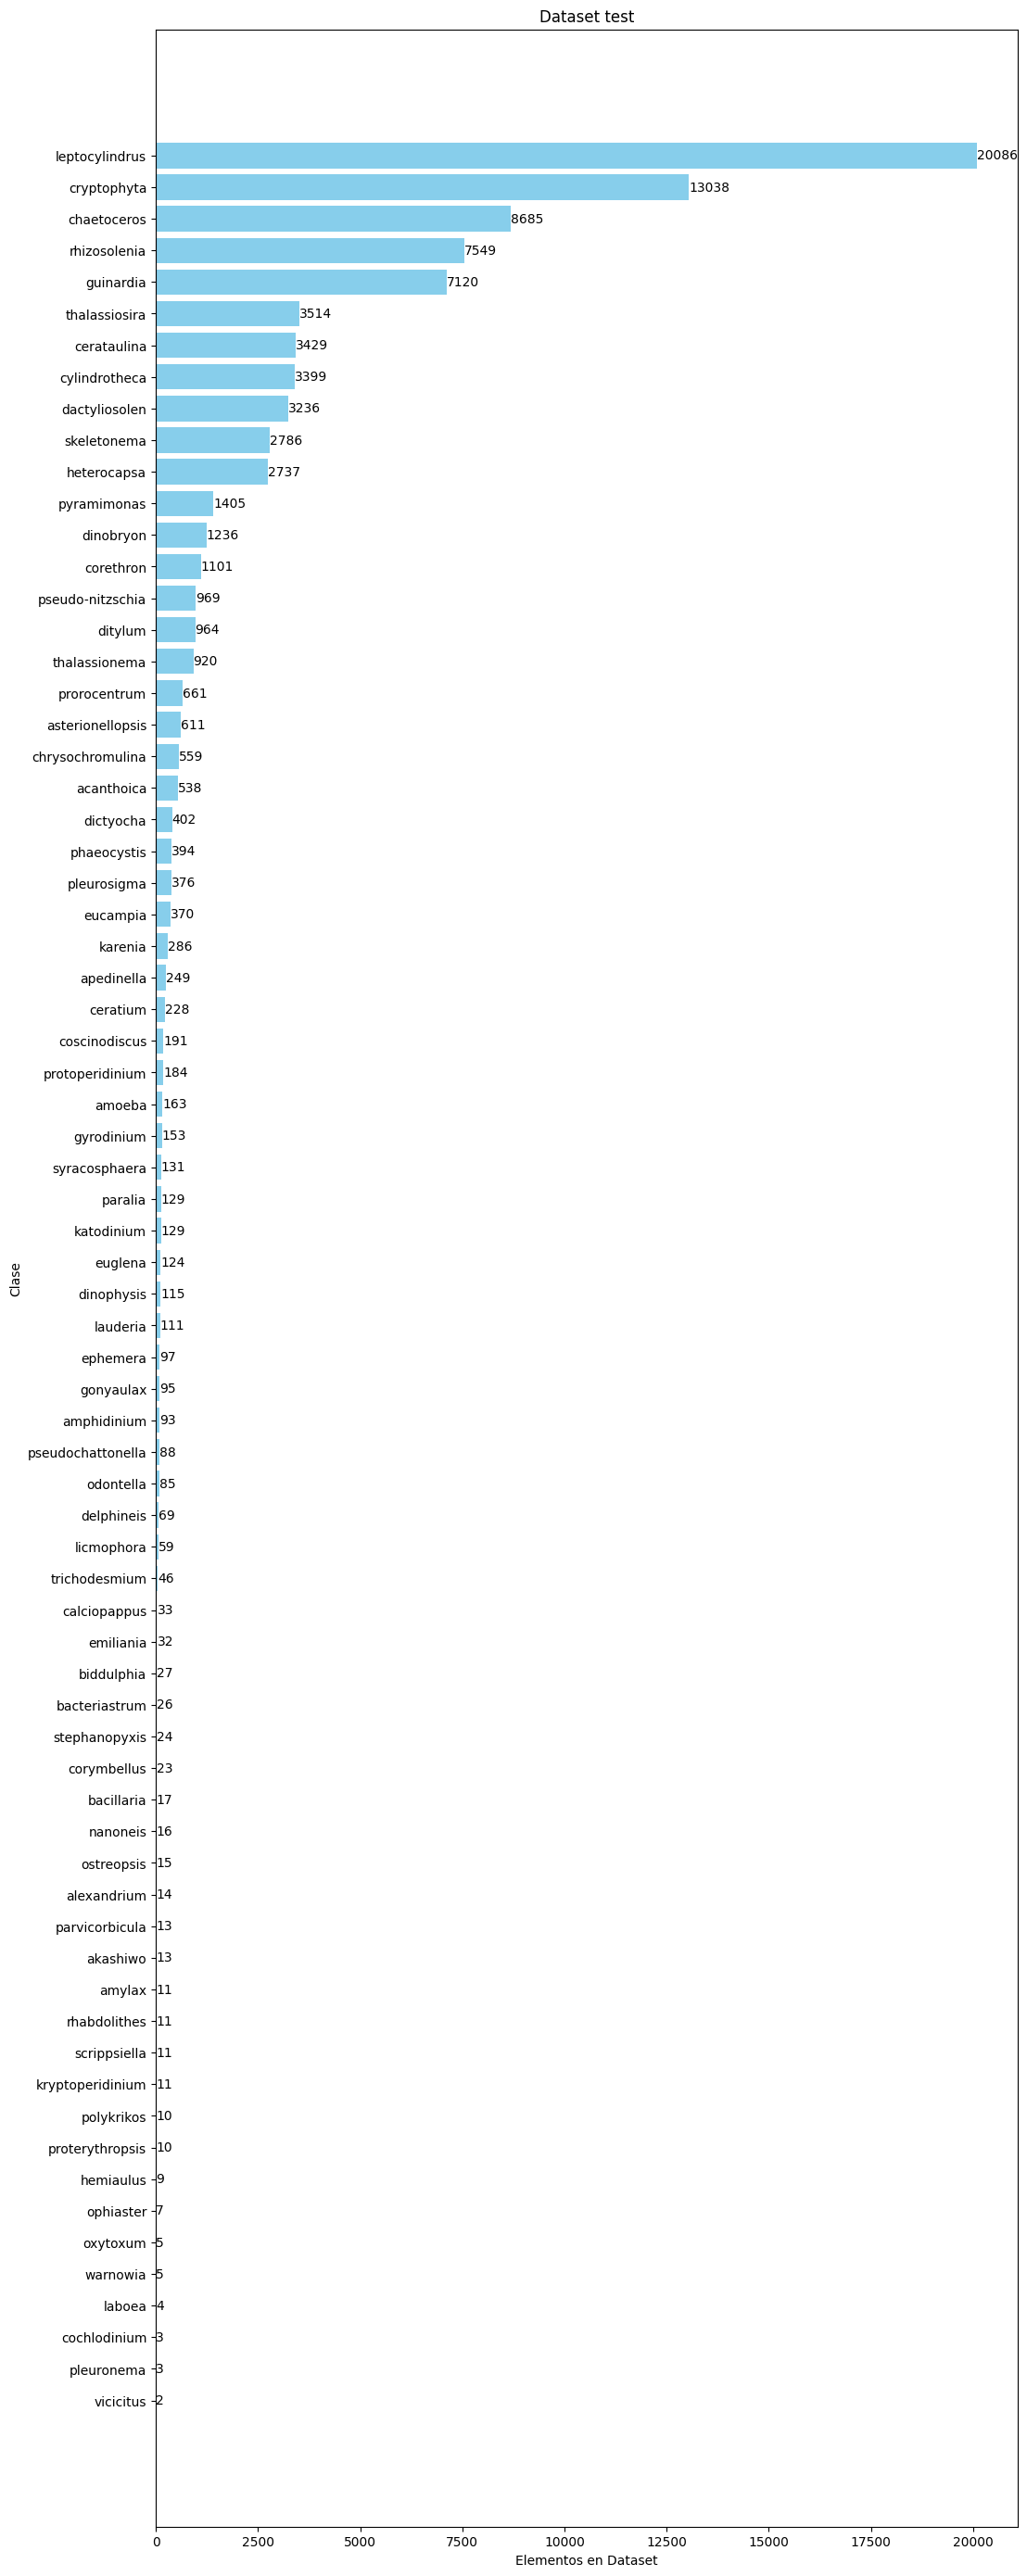

In [ ]:
df_train = df[['Subcarpeta', 'Elementos_train']]
df_val = df[['Subcarpeta', 'Elementos_val']]
df_test = df[['Subcarpeta', 'Elementos_test']]

graficar_elementos_por_subcarpeta(df_train, 'Elementos_train', "Dataset train")
graficar_elementos_por_subcarpeta(df_val, 'Elementos_val', "Dataset val")
graficar_elementos_por_subcarpeta(df_test, 'Elementos_test', "Dataset test")

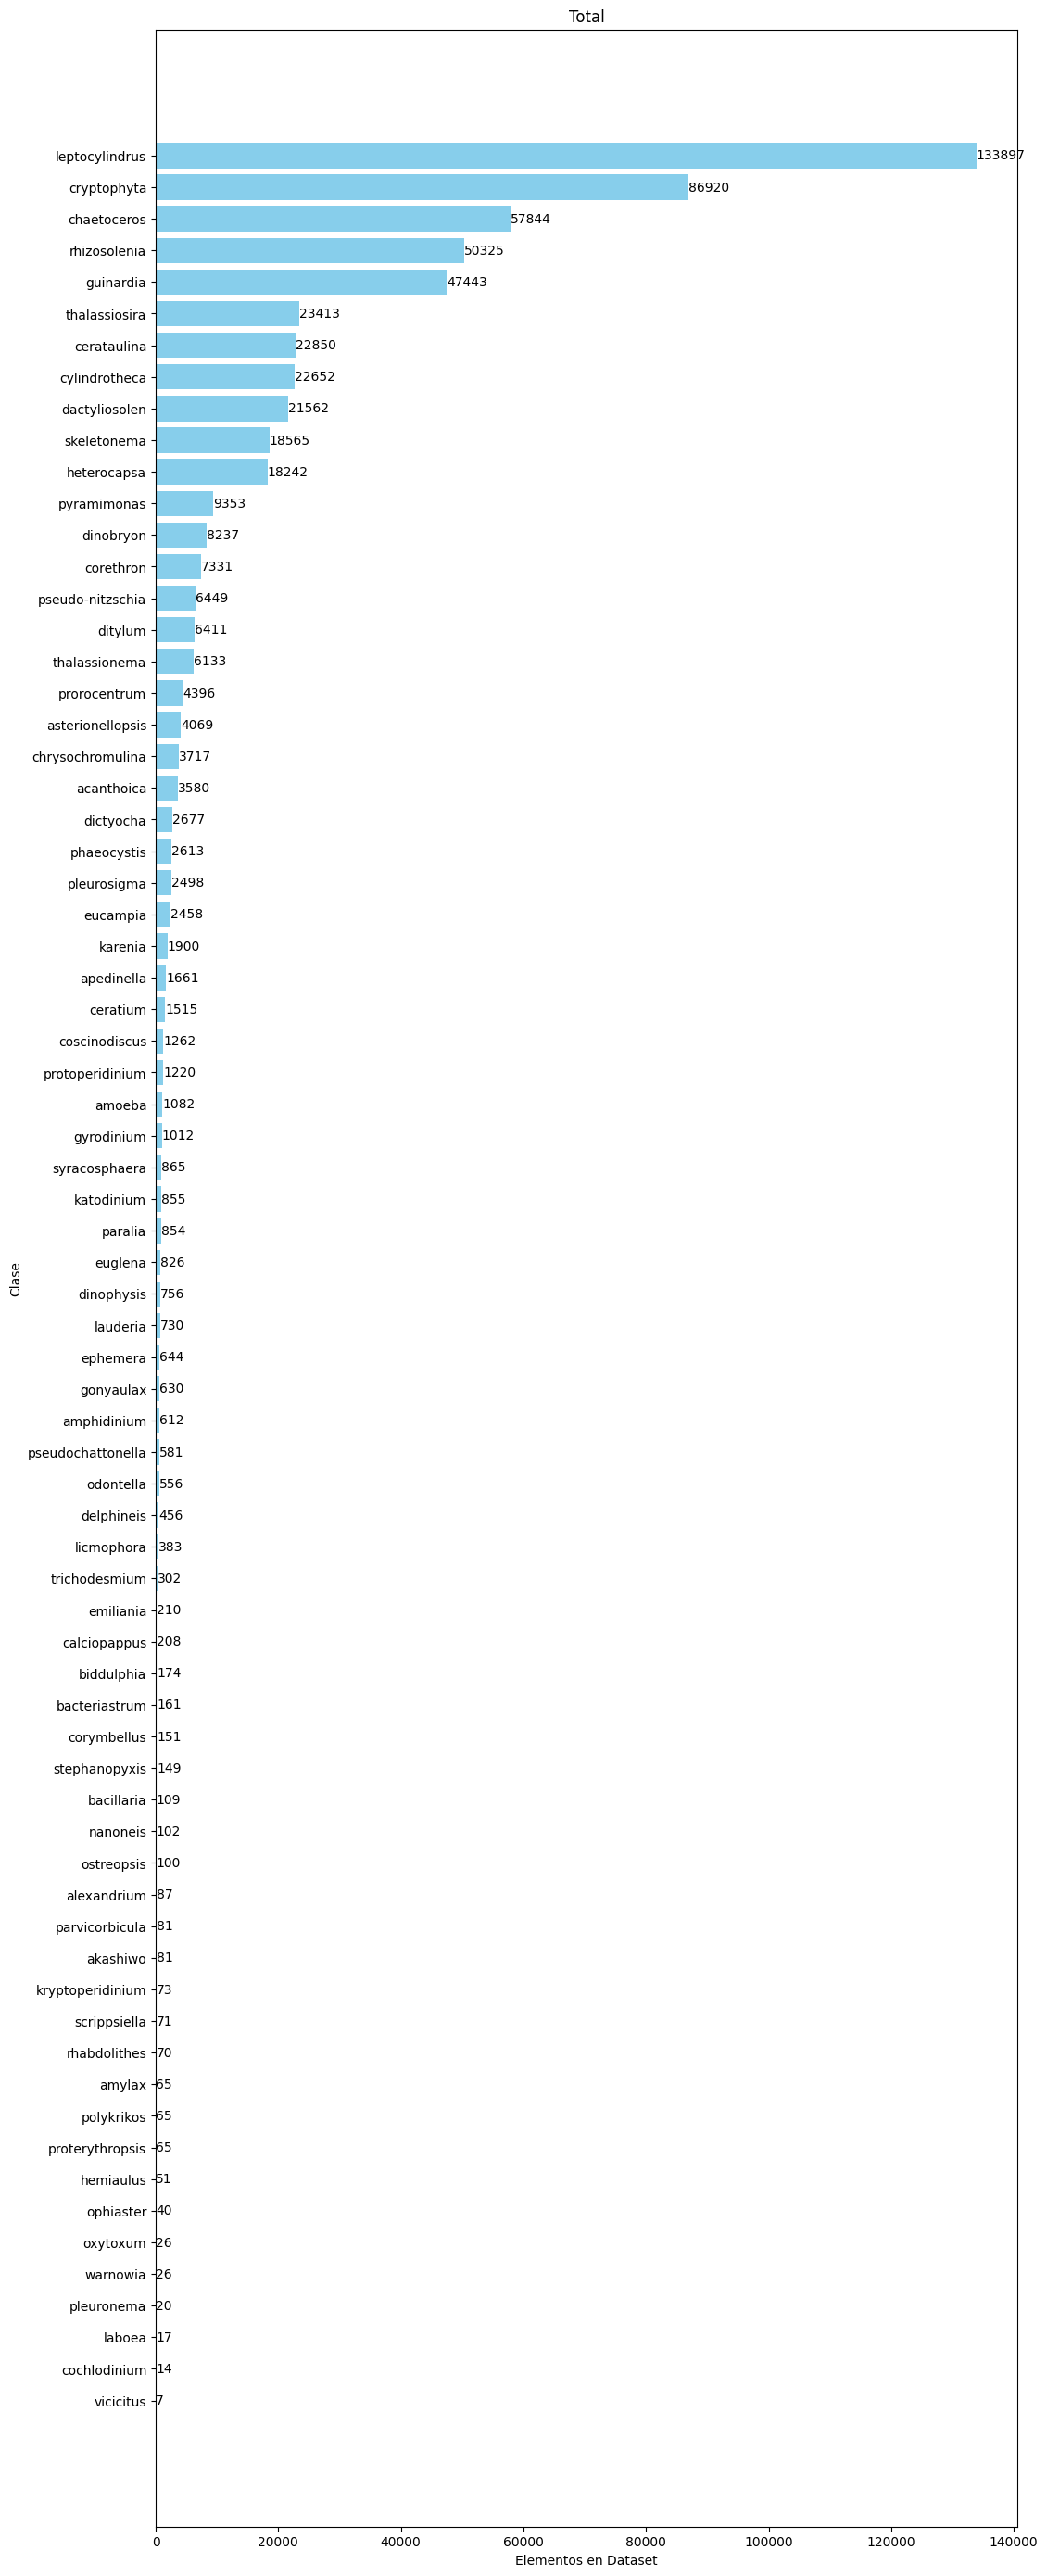

In [ ]:
df["Suma"] = df['Elementos_train'] + df['Elementos_val'] + df['Elementos_test']
df_suma = df[['Subcarpeta', 'Suma']]

graficar_elementos_por_subcarpeta(df_suma, 'Suma', "Total")

Conjunto de datos organizado por generos

# Preprocesado


In [ ]:
"""

Esta parte es la que utilizo para la aumentacion de imagenes.
En este caso se le manda una lista con los nombres a los que se le quiere hacer la aumentacion y cuantas imagenes se quieren.

IMPORTANTE: La aumentacion de datos solo se hace en el conjunto de entrenamiento
"""

from PIL import Image  # Para cargar imágenes fácilmente
import os
from shutil import copyfile

# Configuración del aumento de datos
datagen = ImageDataGenerator(
    rotation_range=180,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.9, 1.2],
)

# Ruta a tu conjunto de datos
dataset_path = '/content/content/WHOI_MVCO_Planktonnet/train'

# Define las clases minoritarias manualmente o encuentra automáticamente las clases con menos imágenes
clases_minoritarias = ['']

# Iterar sobre cada clase minoritaria
for clase in clases_minoritarias:
    clase_path = os.path.join(dataset_path, clase)
    imagenes = os.listdir(clase_path)
    num_imagenes_existentes = len(imagenes)

    # Determina el número de imágenes objetivo
    num_imagenes_objetivo = 1000

    # Iterar para generar imágenes hasta alcanzar el objetivo
    while num_imagenes_existentes < num_imagenes_objetivo:
        for imagen_nombre in imagenes:
            imagen_path = os.path.join(clase_path, imagen_nombre)

            # Cargar la imagen utilizando PIL y convertir a RGB si es necesario
            imagen = Image.open(imagen_path)
            if imagen.mode != 'RGB':  # Convertir a RGB si no lo es
                imagen = imagen.convert('RGB')

            # Convertir la imagen a array y ajustar la forma
            imagen_array = np.array(imagen)
            imagen_array = imagen_array.reshape((1,) + imagen_array.shape)  # Agregar dimensión del batch

            # Genera imágenes aumentadas
            contador = 0
            for imagen_aumentada in datagen.flow(imagen_array, batch_size=1, save_to_dir=clase_path, save_prefix='aug', save_format='jpg'):
                contador += 1
                num_imagenes_existentes += 1
                if contador >= 5 or num_imagenes_existentes >= num_imagenes_objetivo:
                    break

        print(f"Se han generado {num_imagenes_existentes} imágenes para la clase {clase}.")

print("Oversampling completo.")


# Entrenamiento de modelos

## Inception V3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator



---

IMPORTANTE: Cada generador de datos se le agrega el parametro de  input_shape. Se puede omitir comentandolo.

---



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios base para cada conjunto de datos
train_dir = '/content/content/WHOI_MVCO_Planktonnet/train'
val_dir = '/content/content/WHOI_MVCO_Planktonnet/val'
test_dir = '/content/content/WHOI_MVCO_Planktonnet/test'

input_shape = (299, 299)
batch_size = 256

# Configuración del generador de datos

datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
    #brightness_range=[0.8, 1.2],
)

# Generador para datos de entrenamiento
train_generator = datagen_train.flow_from_directory(
    directory=train_dir,
    #target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

# Generador para datos de validación
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_dir,
    #target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

# Generador para datos de prueba
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    #target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)


Found 416109 images belonging to 72 classes.
Found 89186 images belonging to 72 classes.
Found 89265 images belonging to 72 classes.


In [ ]:
cls_train = train_generator.classes
cls_validate = validation_generator.classes

class_names = list(train_generator.class_indices.keys())
num_classes = train_generator.num_classes

print(class_names)
print(num_classes)

['acanthoica', 'akashiwo', 'alexandrium', 'amoeba', 'amphidinium', 'amylax', 'apedinella', 'asterionellopsis', 'bacillaria', 'bacteriastrum', 'biddulphia', 'calciopappus', 'cerataulina', 'ceratium', 'chaetoceros', 'chrysochromulina', 'cochlodinium', 'corethron', 'corymbellus', 'coscinodiscus', 'cryptophyta', 'cylindrotheca', 'dactyliosolen', 'delphineis', 'dictyocha', 'dinobryon', 'dinophysis', 'ditylum', 'emiliania', 'ephemera', 'eucampia', 'euglena', 'gonyaulax', 'guinardia', 'gyrodinium', 'hemiaulus', 'heterocapsa', 'karenia', 'katodinium', 'kryptoperidinium', 'laboea', 'lauderia', 'leptocylindrus', 'licmophora', 'nanoneis', 'odontella', 'ophiaster', 'ostreopsis', 'oxytoxum', 'paralia', 'parvicorbicula', 'phaeocystis', 'pleuronema', 'pleurosigma', 'polykrikos', 'prorocentrum', 'proterythropsis', 'protoperidinium', 'pseudo-nitzschia', 'pseudochattonella', 'pyramimonas', 'rhabdolithes', 'rhizosolenia', 'scrippsiella', 'skeletonema', 'stephanopyxis', 'syracosphaera', 'thalassionema', '

In [ ]:
#Estos son los pesos de clase donde todas obtienen el mismo valor. Sirve para el desbalance de datos.

from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)
class_weight = dict(enumerate(class_weight))

*EarlyStopping* evita que el modelo continue entrenando midiendo el val_loss.

Parametros:
* **monitor**: Establece la metrica que usara para evaluar si se detiene o no. Se pueden usar mas metricas tambien.

* **patience**: es el numero de epochs que evalua en caso de que no haya mejora.

* **restore_best_weights**: regresa a los pesos que tuvieron mejor resultado antes de detenerse.



---



*ReduceLROnPlateau* evita que el modelo tenga sobreajuste reduciendo el learning rate.

* **monitor**: Establece la metrica que usara para evaluar si se detiene o no. Se pueden usar mas metricas tambien.

* **patience**: es el numero de epochs que evalua en caso de que no haya mejora.

* **factor**: determina la cantidad por la que se reduce la tasa de aprendizaje (learning rate) cuando la métrica monitoreada (en este caso, 'val_loss') deja de mejorar.

* **min_lr**: es el valor minimo de learning rate al que llegara, si lo supera entonces se detiene.

In [ ]:
#Estos callbacks sirven para evitar el sobreajuste y el underfitting

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

Esta es una metrica personalizada que se agrega al entrenamiento. Cuenta si la clasificacion correcta esta en las primeras 10 clasificaciones que hace el modelo.

Es una metrica opcional.

In [ ]:
def top_10_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=10)



---



Estas son las epochs que utilizo para el entrenamiento. Se divide en 3 partes:

* top layers: Se entrenan 10 epochs el clasificador con el primer bloque convolucional.

* epochs fine tuning: Se descongelan todas las capas, se reduce el learning rate y se reentrena por 50 epochs.

* epochs extras: Se vuelve a reducir el learning rate y se entrena por 10 epochs mas.

Este es el trabajo del que me guio: https://github.com/JakobKallestad/InceptionV3-on-plankton-images

Puede manejar los epochs como guste.

---



In [ ]:
starting_epoch = 0
epochs_top_layers = 10
epochs_fine_tuning = 50

Esta ha sido la útlima prueba con el conjunto de datos completo. Logra llegar a un 95% de precisión según las métricas

### Primer entrenamiento

In [ ]:
from tensorflow.keras.regularizers import l2
# Crear el modelo base de InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularización L2
x = Dropout(0.3)(x)  # Dropout del 30%


# Actualizar la capa de salida
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas de la base del modelo excepto por el primer bloque Inception
for layer in base_model.layers[:-249]:
    layer.trainable = False
for layer in base_model.layers[-249:]:
    layer.trainable = True

# Compilar el modelo
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_10_accuracy])

# Entrenar el modelo (solo las capas superiores)
history = model.fit(train_generator,
                    epochs=epochs_top_layers+starting_epoch, #Esto puede modificarlo si gusta
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1626/1626 ━━━━━━━━━━━━━━━━━━━━ 1068s 622ms/step - categorical_accuracy: 0.5425 - loss: 3.9472 - top_10_accuracy: 0.8831 - val_categorical_accuracy: 0.7870 - val_loss: 1.8617 - val_top_10_accuracy: 0.9824 - learning_rate: 1.0000e-04
Epoch 2/10
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 966s 592ms/step - categorical_accuracy: 0.7653 - loss: 2.3190 - top_10_accuracy: 0.9779 - val_categorical_accuracy: 0.7831 - val_loss: 1.6844 - val_top_10_accuracy: 0.9860 - learning_rate: 1.0000e-04
Epoch 3/10
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 966s 592ms/step - categorical_accuracy: 0.8139 - loss: 1.6721 - top_10_accuracy: 0.9894 - val_categorical_accuracy: 0.7577 - val_loss: 1.5803 - val_top_10_accuracy: 0.9781 - learning_rate: 1.0000e-04
Epoch 4/10
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 966s 592ms/step - categorical_accuracy: 0.8473 - loss: 1.2172 - top_10_accuracy: 0.9932 - val_categorical_accuracy: 0.8460 - val_loss: 1.0967 - val_top_10_accuracy: 0.9925 - learning_rate: 1.0000e-04
Epoch 5/10
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 

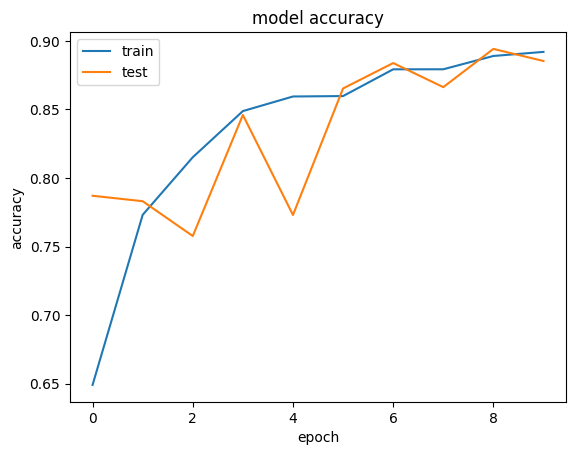

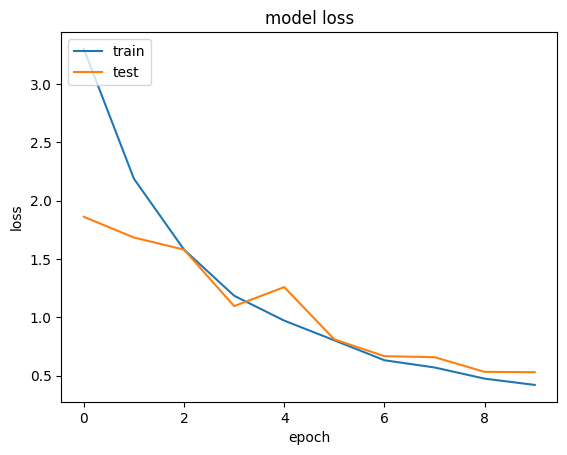

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


349/349 ━━━━━━━━━━━━━━━━━━━━ 192s 550ms/step - categorical_accuracy: 0.8638 - loss: 0.6098 - top_10_accuracy: 0.9945
Test-set classification accuracy: 88.74%


### Segundo entrenamiento

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar todas las capas
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_10_accuracy])

# Continuar entrenando el modelo (fine-tuning)
history = model.fit(train_generator,
                    initial_epoch=starting_epoch+epochs_top_layers,
                    epochs=starting_epoch+epochs_top_layers+epochs_fine_tuning,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 11/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 1061s 616ms/step - categorical_accuracy: 0.9070 - loss: 0.2878 - val_categorical_accuracy: 0.9195 - val_loss: 0.4028 - learning_rate: 1.0000e-05
Epoch 12/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 966s 592ms/step - categorical_accuracy: 0.9265 - loss: 0.2203 - val_categorical_accuracy: 0.9246 - val_loss: 0.3732 - learning_rate: 1.0000e-05
Epoch 13/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 968s 593ms/step - categorical_accuracy: 0.9353 - loss: 0.1895 - val_categorical_accuracy: 0.9260 - val_loss: 0.3603 - learning_rate: 1.0000e-05
Epoch 14/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 965s 592ms/step - categorical_accuracy: 0.9408 - loss: 0.1641 - val_categorical_accuracy: 0.9277 - val_loss: 0.3430 - learning_rate: 1.0000e-05
Epoch 15/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 964s 591ms/step - categorical_accuracy: 0.9456 - loss: 0.1417 - val_categorical_accuracy: 0.9352 - val_loss: 0.3053 - learning_rate: 1.0000e-05
Epoch 16/60
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 970s 594ms/step - cat

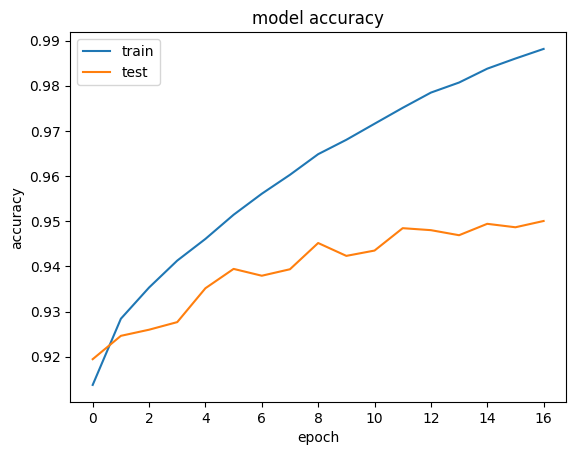

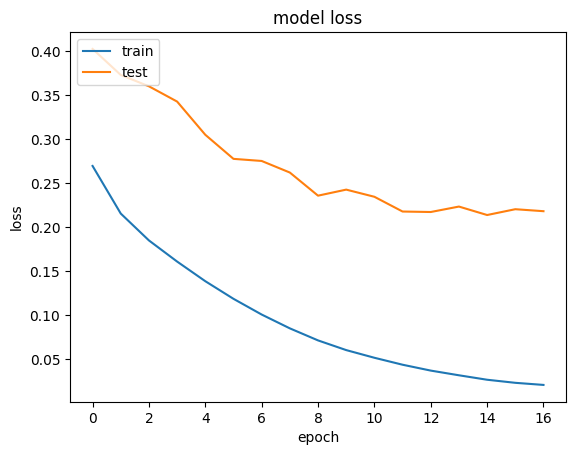

In [ ]:
plot_history(history)

Reviso los primeros resultados con el entrenamiento despues de entrenar todas las capas

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

349/349 ━━━━━━━━━━━━━━━━━━━━ 170s 488ms/step - categorical_accuracy: 0.9350 - loss: 0.2717
Test-set classification accuracy: 94.92%


In [ ]:
# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())


In [ ]:
# Generar el reporte de clasificación
generate_classification_report(y_true, y_pred_classes, class_names)


349/349 ━━━━━━━━━━━━━━━━━━━━ 185s 508ms/step
                   precision    recall  f1-score   support

       acanthoica       0.74      0.86      0.80       538
         akashiwo       0.92      0.92      0.92        13
      alexandrium       0.67      0.43      0.52        14
           amoeba       0.73      0.70      0.71       163
      amphidinium       0.77      0.71      0.74        93
           amylax       1.00      0.27      0.43        11
       apedinella       0.75      0.77      0.76       249
 asterionellopsis       0.89      0.93      0.91       611
       bacillaria       0.79      0.65      0.71        17
    bacteriastrum       0.71      0.65      0.68        26
       biddulphia       0.60      0.67      0.63        27
     calciopappus       0.36      0.39      0.38        33
      cerataulina       0.87      0.92      0.89      3429
         ceratium       0.92      0.96      0.94       228
      chaetoceros       0.97      0.95      0.96      8685
 chrysochr

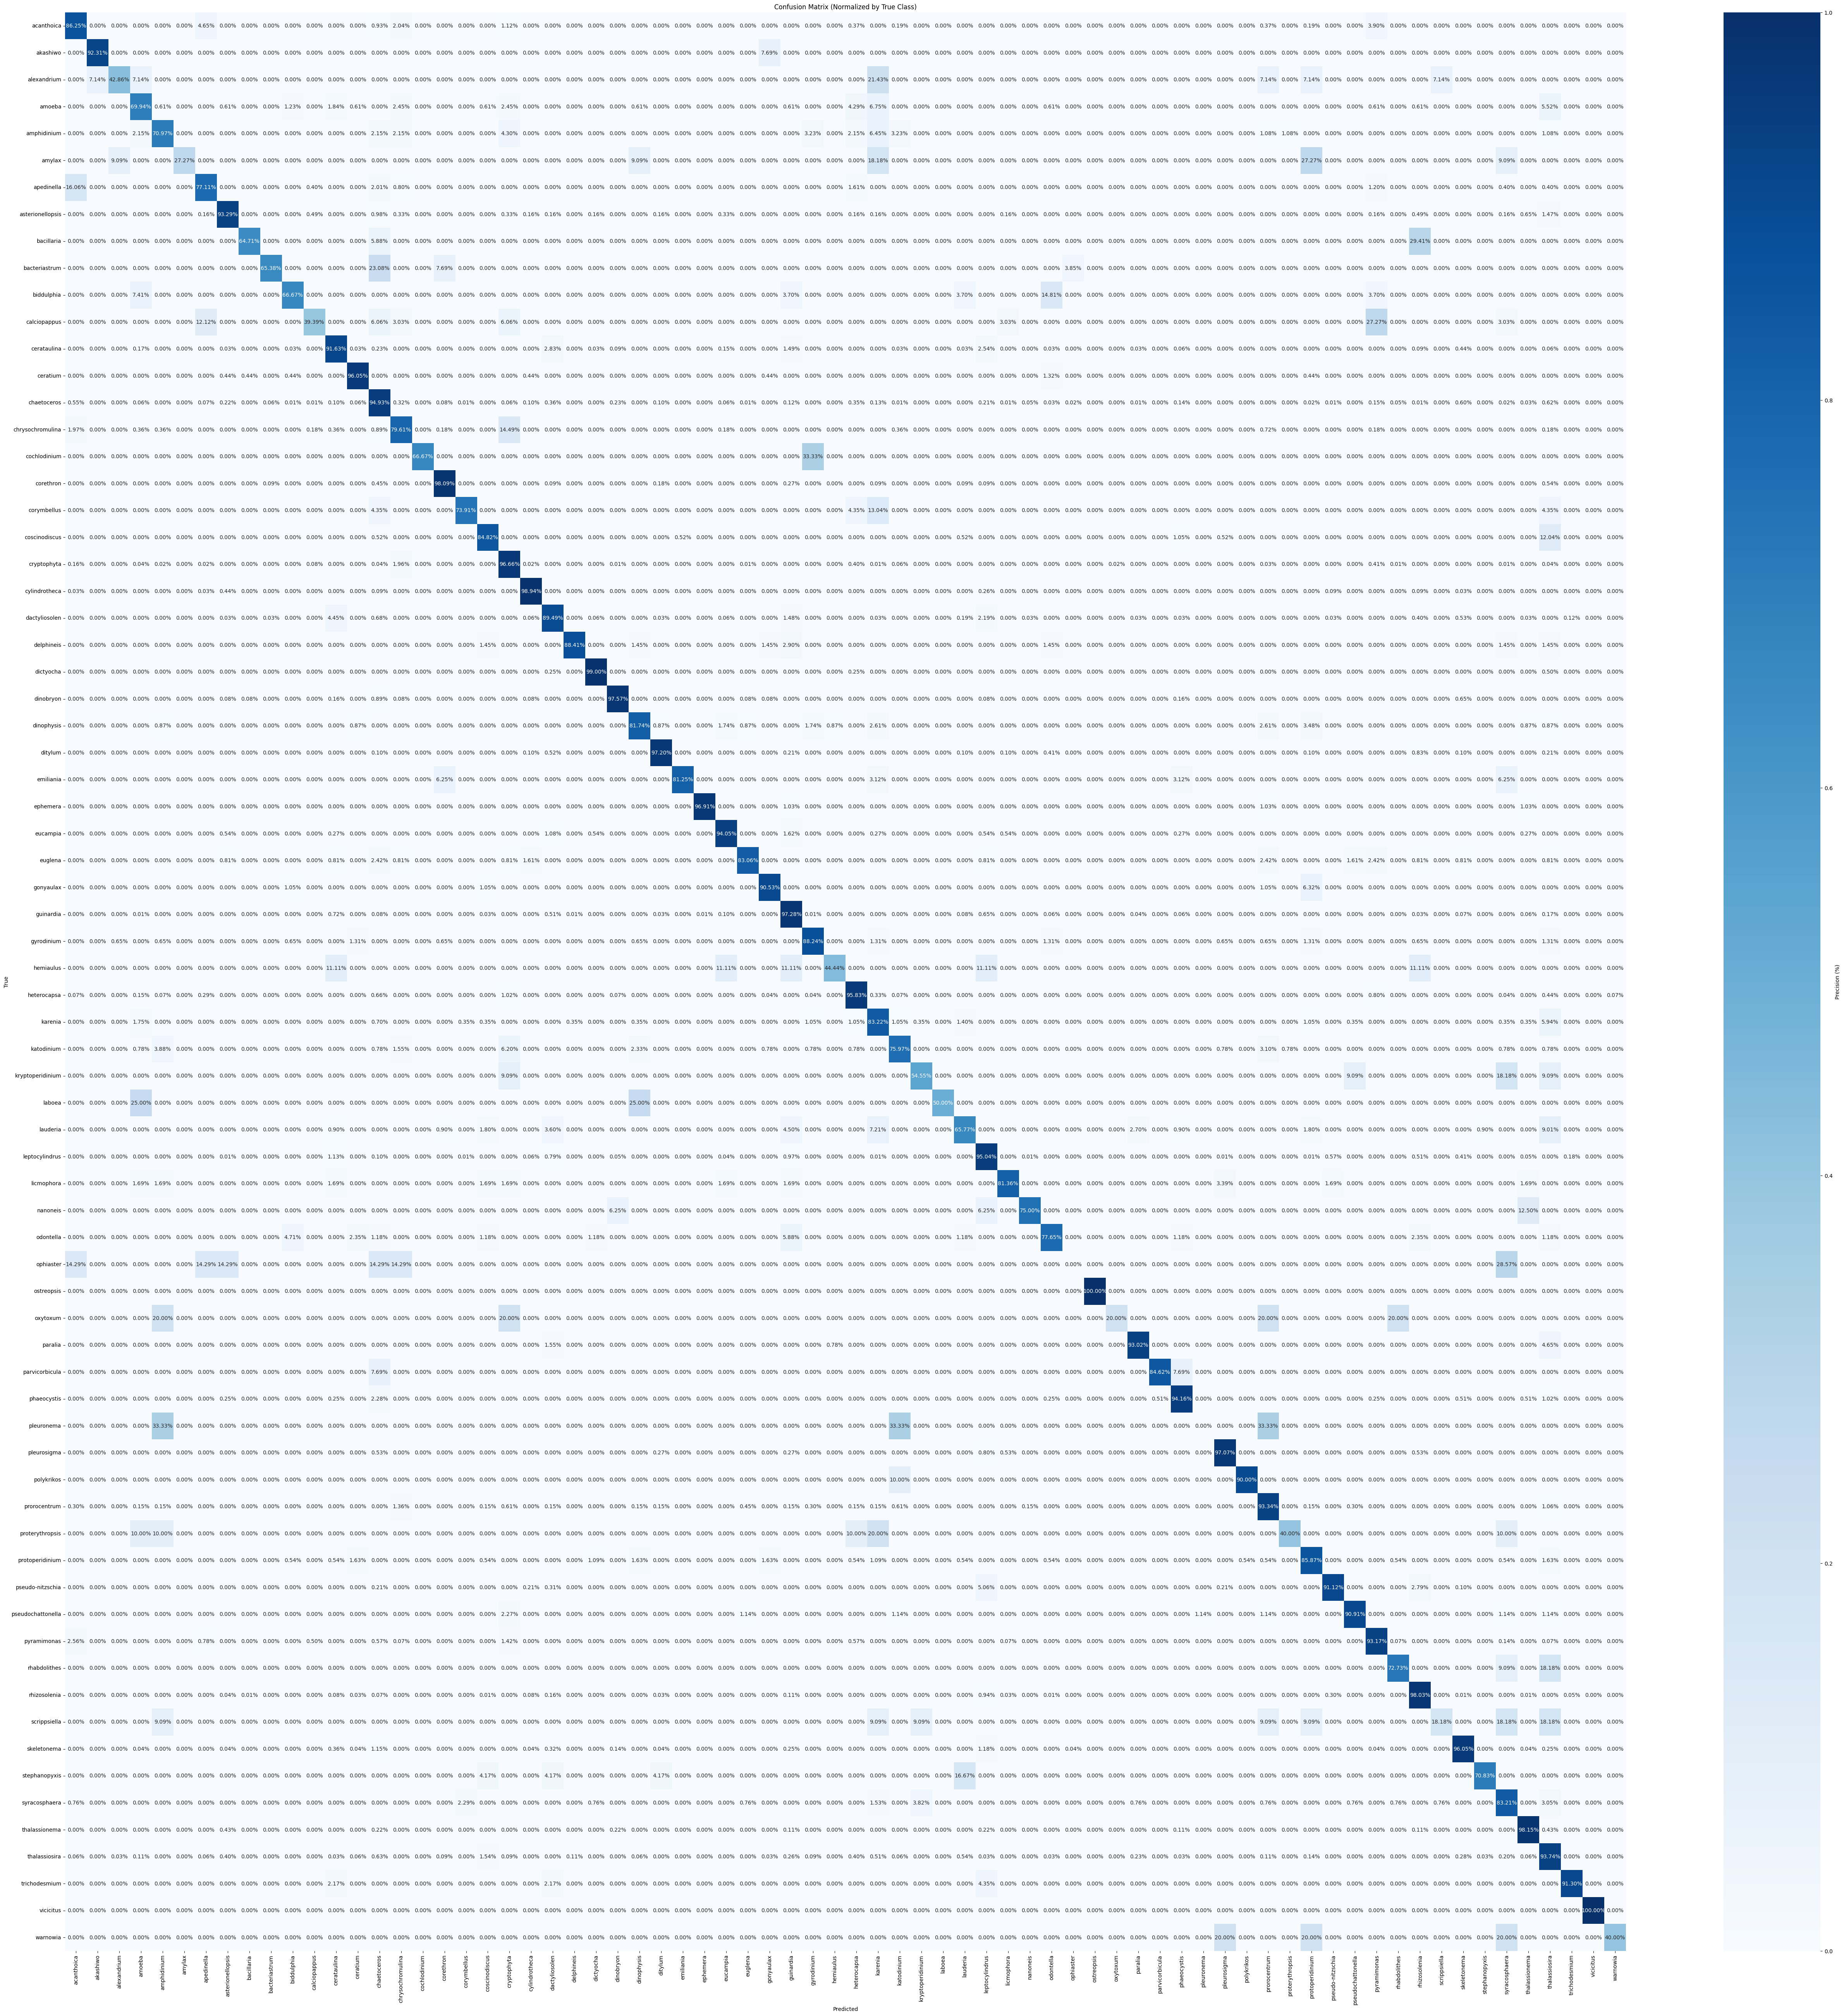

In [ ]:
# Generar la matriz de confusión normalizada
plot_normalized_confusion_matrix(y_true, y_pred_classes, class_names)

### Tercer entrenamiento

Se entrena por 5 epochs mas. En el trabajo mencionan 10 pero lo hice 5 por el tiempo.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar todas las capas
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Continuar entrenando el modelo (fine-tuning)
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 1/5
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 1058s 615ms/step - categorical_accuracy: 0.9876 - loss: 0.0229 - val_categorical_accuracy: 0.9512 - val_loss: 0.2090 - learning_rate: 1.0000e-06
Epoch 2/5
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 968s 593ms/step - categorical_accuracy: 0.9887 - loss: 0.0219 - val_categorical_accuracy: 0.9512 - val_loss: 0.2081 - learning_rate: 1.0000e-06
Epoch 3/5
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 973s 596ms/step - categorical_accuracy: 0.9893 - loss: 0.0212 - val_categorical_accuracy: 0.9515 - val_loss: 0.2077 - learning_rate: 1.0000e-06
Epoch 4/5
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 973s 596ms/step - categorical_accuracy: 0.9896 - loss: 0.0209 - val_categorical_accuracy: 0.9517 - val_loss: 0.2067 - learning_rate: 1.0000e-06
Epoch 5/5
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 974s 597ms/step - categorical_accuracy: 0.9899 - loss: 0.0201 - val_categorical_accuracy: 0.9520 - val_loss: 0.2056 - learning_rate: 1.0000e-06


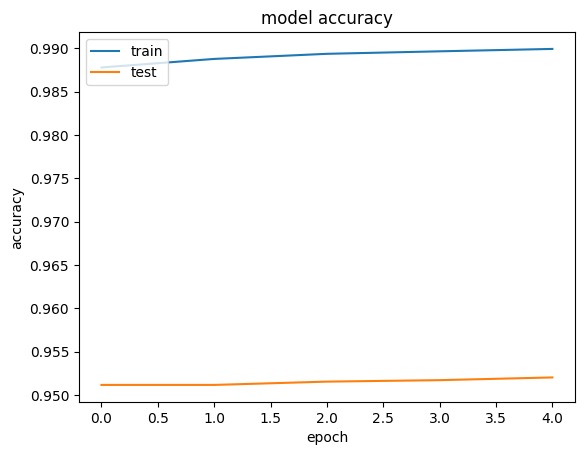

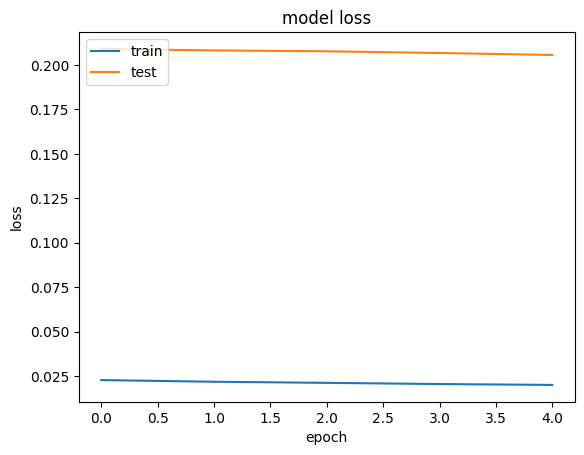

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

349/349 ━━━━━━━━━━━━━━━━━━━━ 177s 507ms/step - categorical_accuracy: 0.9363 - loss: 0.2711
Test-set classification accuracy: 95.22%


In [ ]:
# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

In [ ]:
# Generar el reporte de clasificación
generate_classification_report(y_true, y_pred_classes, class_names)

349/349 ━━━━━━━━━━━━━━━━━━━━ 170s 488ms/step
                   precision    recall  f1-score   support

       acanthoica       0.76      0.83      0.79       538
         akashiwo       0.92      0.92      0.92        13
      alexandrium       0.55      0.43      0.48        14
           amoeba       0.75      0.72      0.73       163
      amphidinium       0.77      0.71      0.74        93
           amylax       1.00      0.27      0.43        11
       apedinella       0.75      0.79      0.77       249
 asterionellopsis       0.90      0.93      0.91       611
       bacillaria       0.85      0.65      0.73        17
    bacteriastrum       0.65      0.65      0.65        26
       biddulphia       0.67      0.59      0.63        27
     calciopappus       0.40      0.18      0.25        33
      cerataulina       0.89      0.91      0.90      3429
         ceratium       0.91      0.96      0.94       228
      chaetoceros       0.97      0.95      0.96      8685
 chrysochr

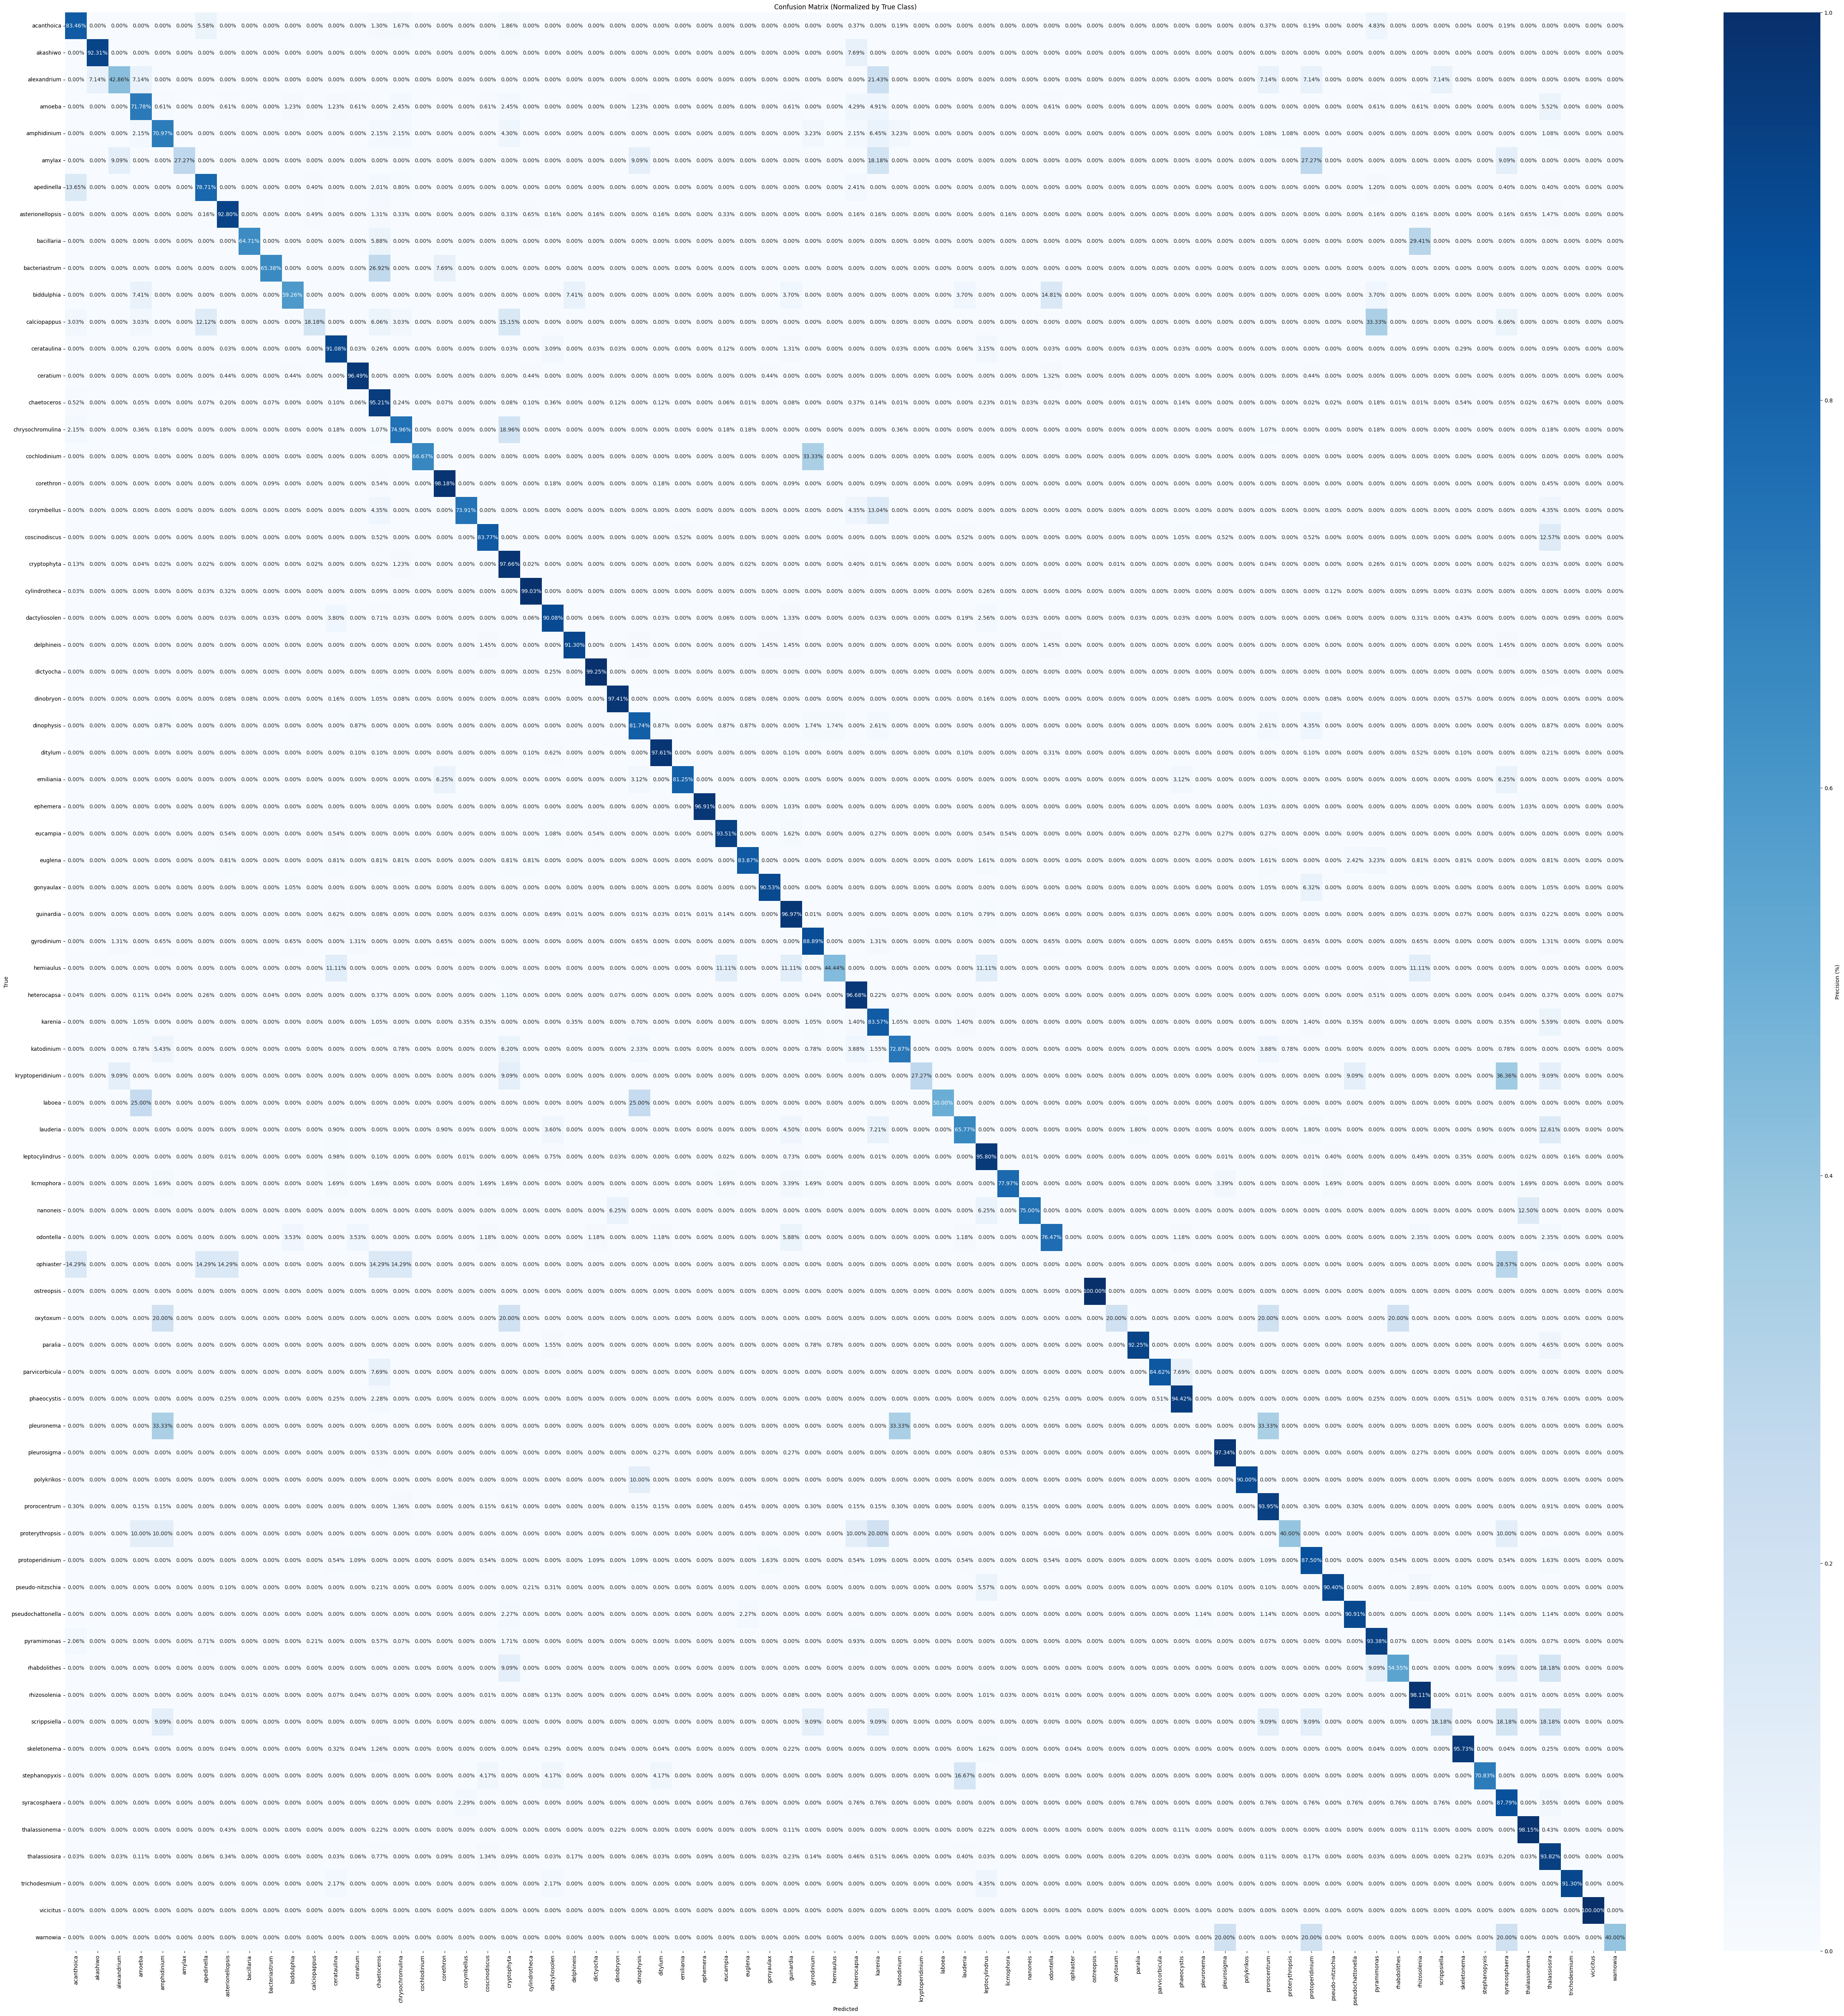

In [ ]:
# Generar la matriz de confusión normalizada
plot_normalized_confusion_matrix(y_true, y_pred_classes, class_names)

In [ ]:
# prompt: quiero guardar mi modelo en .keras

model.save('InceptionV3_72.keras')
